<h1  style="color:white; background-color: #154360; padding:30px;"> 
Résultats numériques pour l'algorithme Neural Optimal Stopping en dimension d > 1 </h1>

In [1]:
import sys
import helper_plots


sys.path.append("..")


import numpy as np

import src.tools.diffusion.black_scholes as bs
import torch
from torch import nn
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import pandas as pd

import src.main.nos.nos_class_multi_dimensional as nos_ND
import src.tools.option.option_main_class as option

### MAXCALL en dimension 2

In [73]:
d = 2
n_path = 10000
batch_size = 10000
n_simulation = 50
epochs = 80
spot = 110
sigma = 0.2
rate = 0.05
strike = 100
dividend = 0.1
maturity = 3
asset = [bs.BlackScholes(spot, rate, sigma, dividend) for _ in range(2)]
l_girsanov = (rate - dividend + 0.1 * np.log(d)) / 0.2


def payoff(x):
    intrinsic_value = torch.max(x) - strike
    return torch.maximum(intrinsic_value, torch.tensor(0))

option_ = option.Option(maturity,strike,rate,payoff)

def change_coordinates(x):
    return torch.max(x)

In [74]:
epsilon = 10

learning_rate = 5e-2

activation_function = nn.ReLU()


weights = [40, 20]


nos = nos_ND.NosMultiDimensional(asset, option_, change_coordinates)

sharp_region, history, time_taken = nos.find_optimal_region(
    n_simulation,
    n_path,
    epsilon,

    l_girsanov,

    batch_size,
    learning_rate,
    epochs,

    activation_function,
    weights,

    verbose=False,

)

100%|██████████| 80/80 [46:47<00:00, 35.09s/it]


In [77]:
minutes, sec = int(time_taken / 60), int(time_taken % 60)
print(f"time taken is {minutes} minutes and {sec} seconds")

time taken is 46 minutes and 47 seconds


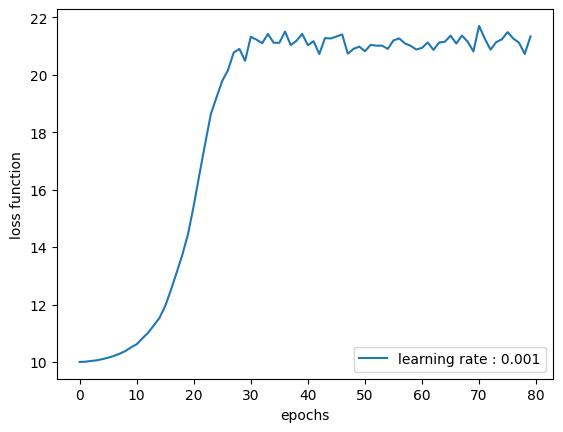

In [78]:
plt.plot(history,label=f'learning rate : {learning_rate}')
plt.ylabel("loss function")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [85]:
x = np.linspace(30, 200, 100)
y = np.linspace(30, 200, 100)
X, Y = np.meshgrid(x, y)

def get_Z(t):  
    def f(x, y):
        with torch.no_grad():
            sharp_region.eval()
            alpha_X = max(x, y)
            input_to_tensor = torch.tensor([t, x / alpha_X, y / alpha_X]).unsqueeze(0)
            return sharp_region(input_to_tensor).detach().numpy()[0]


    # Evaluate the function on the grid
    Z = np.zeros_like(X)
    for i in tqdm(range(X.shape[0])):
        for j in range(X.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])

    return Z

In [86]:
def plot_at_t(times):
    plt.figure(figsize=(15, 5))  # Adjust the figure size for 4 plots

    for idx, time in enumerate(times):
        plt.subplot(1, len(times), idx + 1)
        Z = get_Z(t=time)  # You need to define this function
        condition = Z - np.maximum(X, Y) < epsilon
        levels = np.linspace(condition.min(), condition.max(), 100)
        plt.plot(x, x, "k--", linewidth=2)
        plt.contourf(X, Y, condition, levels=levels, cmap="RdYlBu_r")
        plt.colorbar()

        abs_condition = np.abs(Z - np.maximum(X, Y)) < epsilon
        plt.contourf(
            X, Y, abs_condition, levels=[0.5, 1.5], colors=['purple'], alpha=1
        )
        # plt.colorbar()
        plt.title(f"T = {time}")

        # plt.xlabel("S1")
        # plt.ylabel("S2")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\amaury.manzione\AppData\Local\Temp\ipykernel_5604\779128369.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = f(X[i, j], Y[i, j])
100%|██████████| 100/100 [00:01<00:00, 80.01it/s]


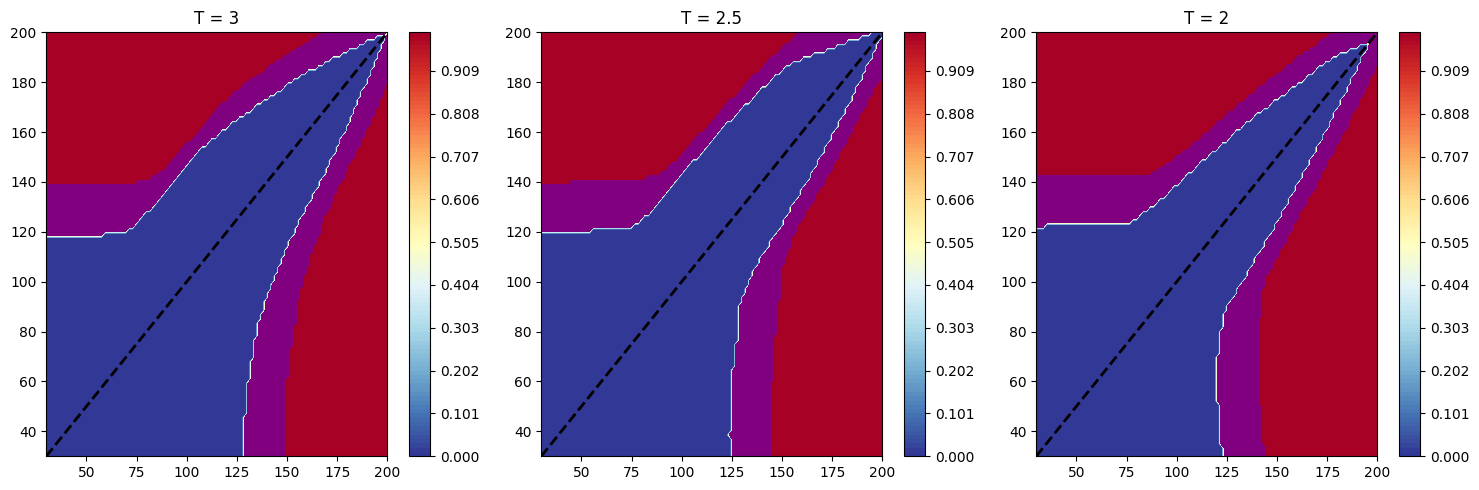

In [87]:
plot_at_t([3,2.5,2])

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\amaury.manzione\AppData\Local\Temp\ipykernel_5604\779128369.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = f(X[i, j], Y[i, j])
100%|██████████| 100/100 [00:01<00:00, 70.95it/s]


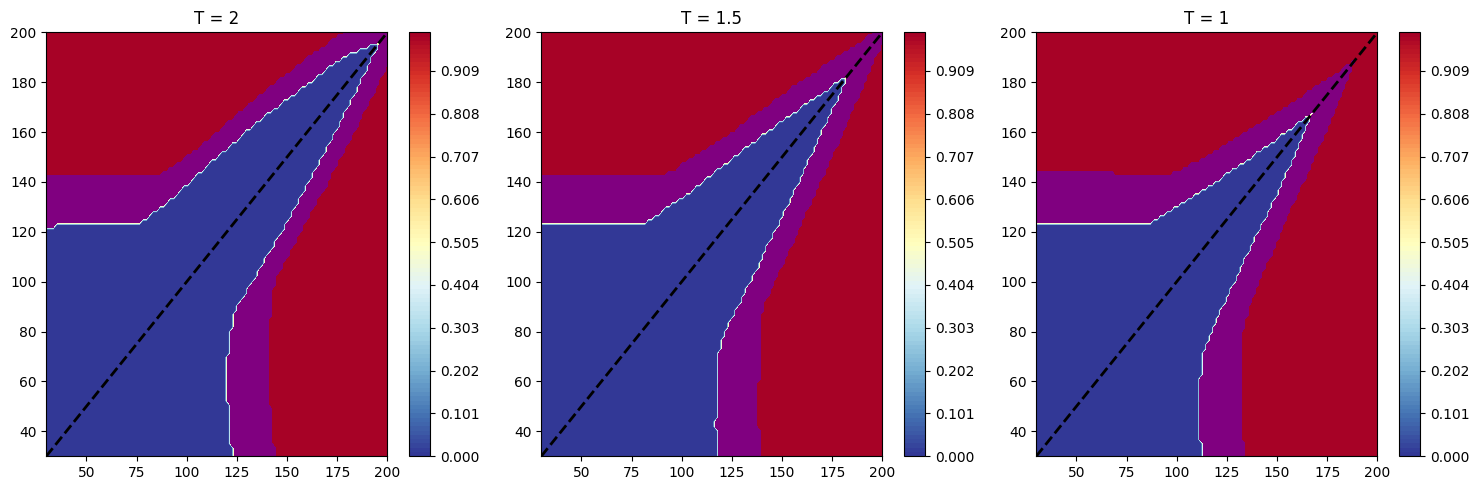

In [88]:
plot_at_t([2,1.5,1])

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\amaury.manzione\AppData\Local\Temp\ipykernel_5604\779128369.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = f(X[i, j], Y[i, j])
100%|██████████| 100/100 [00:01<00:00, 69.45it/s]


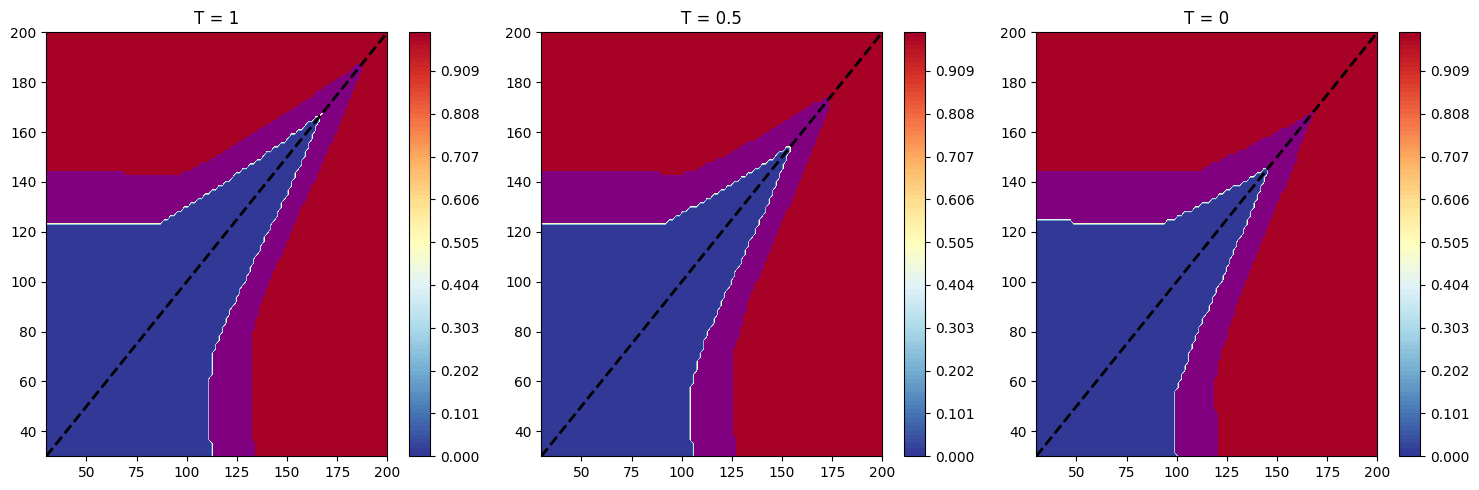

In [89]:
plot_at_t([1,0.5,0])

MAXCALL EN DIMENSION 50

In [112]:
d = 20
n_path = 5000
batch_size = 5000
n_simulation = 9
epochs = 30
spot = 110
sigma = 0.2
rate = 0.05
strike = 100
dividend = 0.1
maturity = 3
asset = [bs.BlackScholes(spot, rate, sigma, dividend) for _ in range(d)]
l_girsanov = (rate - dividend + 0.01 * np.log(d)) / 0.2


def payoff(x):
    intrinsic_value = torch.max(x) - strike
    return torch.maximum(intrinsic_value, torch.tensor(0))

option_ = option.Option(maturity,strike,rate,payoff)

def change_coordinates(x):
    return torch.max(x)

In [113]:
print(l_girsanov)

-0.10021338632230047


In [114]:
epsilon = 5

learning_rate = 5e-2

activation_function = nn.ReLU()


weights = [40+d, 20+d]


nos = nos_ND.NosMultiDimensional(asset, option_, change_coordinates)

sharp_region, history, time_taken = nos.find_optimal_region(
    n_simulation,
    n_path,
    epsilon,
    l_girsanov,
    batch_size,
    learning_rate,
    epochs,
    activation_function,
    weights,
    verbose=False,

)

100%|██████████| 30/30 [00:43<00:00,  1.44s/it]


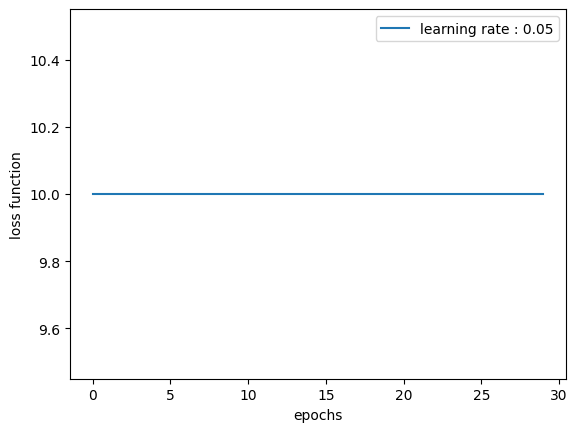

In [115]:
plt.plot(history,label=f'learning rate : {learning_rate}')
plt.ylabel("loss function")
plt.xlabel("epochs")
plt.legend()
plt.show()